In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('traindata.csv', encoding='latin1')
print(df.head())

         ÿid  Gender       Customer_Date_of_Birth  Driving_License  \
0  549771831    Male        Monday, March 7, 1977                1   
1  373583351    Male    Sunday, December 29, 2002                1   
2  933163655  Female     Tuesday, August 23, 1994                1   
3  698942186  Female  Thursday, November 18, 1999                1   
4  515109822    Male  Thursday, February 22, 2001                1   

  Customer_Residence_Sub_County  Previously_Insured  \
0                      EMBAKASI                   0   
1                     WESTLANDS                   1   
2                     DAGORETTI                   1   
3                          JUJA                   0   
4                     WESTLANDS                   0   

   Vehicle_Year_of_Manufacture Vehicle_Damage  Annual_Premium      Agent_name  \
0                         2020            Yes           38294   Jomo Kenyatta   
1                         2020             No           28619  Obiero Ochieng   
2    

In [3]:
df.rename(columns= {"ÿid": "id"}, inplace= True)
df.head(8)

,id,Gender,Customer_Date_of_Birth,Driving_License,Customer_Residence_Sub_County,Previously_Insured,Vehicle_Year_of_Manufacture,Vehicle_Damage,Annual_Premium,Agent_name,Life_policy_start_date,Response
0,549771831,Male,"Monday, March 7, 1977",1,EMBAKASI,0,2020,Yes,38294,Jomo Kenyatta,"Thursday, December 21, 2023",1
1,373583351,Male,"Sunday, December 29, 2002",1,WESTLANDS,1,2020,No,28619,Obiero Ochieng,"Wednesday, June 28, 2023",0
2,933163655,Female,"Tuesday, August 23, 1994",1,DAGORETTI,1,2011,No,27496,Obiero Ochieng,"Saturday, December 9, 2023",0
3,698942186,Female,"Thursday, November 18, 1999",1,JUJA,0,2020,Yes,2630,Gitonga Mwangi,"Tuesday, July 25, 2023",0
4,515109822,Male,"Thursday, February 22, 2001",1,WESTLANDS,0,2015,Yes,23367,Obiero Ochieng,"Saturday, May 13, 2023",0
5,959640851,Female,"Monday, February 5, 1968",1,EMBAKASI,0,2021,Yes,32031,Jomo Kenyatta,"Monday, November 6, 2023",1
6,308486391,Female,"Sunday, January 2, 2000",1,ATHI RIVER,1,2011,No,27619,Obiero Ochieng,"Wednesday, December 20, 2023",0
7,993815373,Female,"Saturday, April 25, 1992",1,KAMUKUNJI,1,2010,No,28771,Obiero Ochieng,"Sunday, October 29, 2023",0


In [4]:
df.columns

Index(['id', 'Gender', 'Customer_Date_of_Birth', 'Driving_License',
       'Customer_Residence_Sub_County', 'Previously_Insured',
       'Vehicle_Year_of_Manufacture', 'Vehicle_Damage', 'Annual_Premium',
       'Agent_name', 'Life_policy_start_date', 'Response'],
      dtype='object')

In [5]:
# Set figure size
plt.figure(figsize=(8,5))

# Group by Agent_name and sum the Annual_Premium
ap = df.groupby("Agent_name")["Annual_Premium"].sum().reset_index()

# Sort by Annual_Premium in descending order
ap = ap.sort_values(by="Annual_Premium", ascending=False)

# Display the sorted DataFrame
print(ap)

          Agent_name  Annual_Premium
124   Obiero Ochieng      3540111121
22     Jomo Kenyatta      2284661069
105  Njoroge Karanja      1997845221
18    Gitonga Mwangi       475238042
41     Kimani Mwenda       312278181
..               ...             ...
148  Wangui Chemutai            5260
138    Wafula Nkatha            5260
147   Wambura Nkatha            2630
69       Mumbi Kinya            2630
31      Kariuki Mwai            2630

[155 rows x 2 columns]


<Figure size 800x500 with 0 Axes>

          Agent_name  Annual_Premium
124   Obiero Ochieng      3540111121
22     Jomo Kenyatta      2284661069
105  Njoroge Karanja      1997845221
18    Gitonga Mwangi       475238042
41     Kimani Mwenda       312278181
6        Chege Nyaga       144430207
130   Onyango Mariga       103846148
38      Kibet Makori        97722877
115      Nyaga Kibet        79467053
27   Karanja Wanjala        60298000


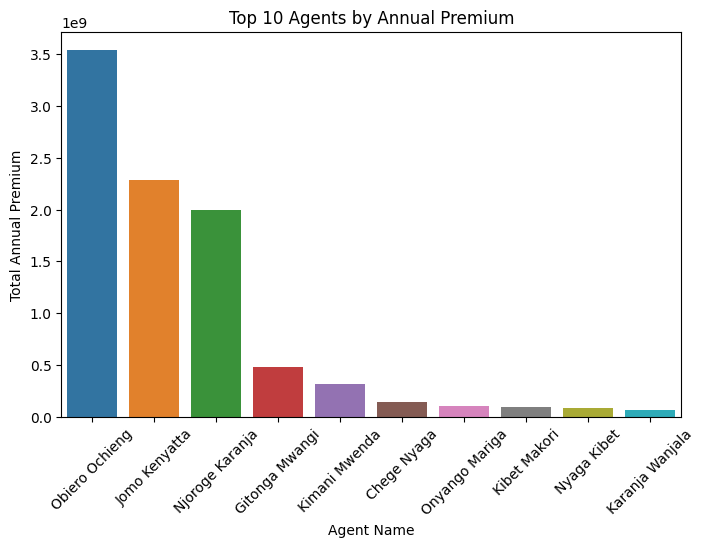

In [6]:
top_10_agents = ap.sort_values(by="Annual_Premium", ascending=False).head(10)

# Display the top 10 agents
print(top_10_agents)

# Plot the top 10 agents
plt.figure(figsize=(8, 5))
sns.barplot(x="Agent_name", y="Annual_Premium", data=top_10_agents)
plt.xticks(rotation=45)  # Rotate agent names for better readability
plt.title("Top 10 Agents by Annual Premium")
plt.xlabel("Agent Name")
plt.ylabel("Total Annual Premium")
plt.show()

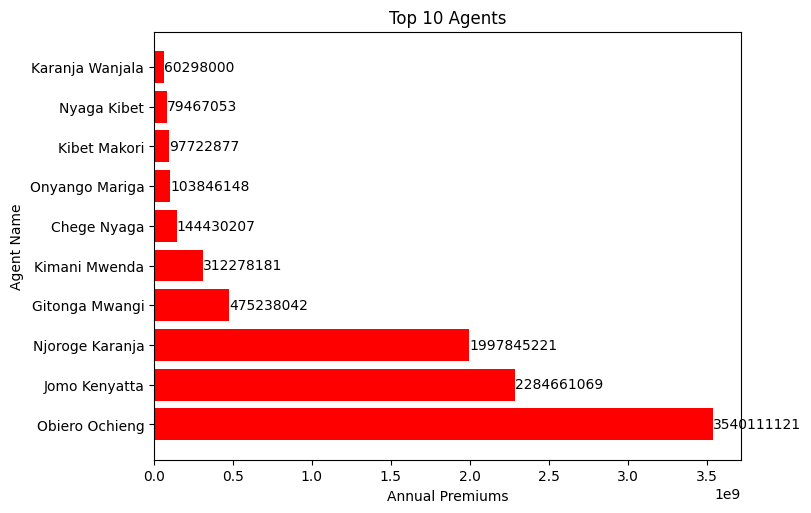

In [7]:
# Plot the top 10 agents
plt.figure(figsize = (8,5))
plt.barh(top_10_agents['Agent_name'],top_10_agents ['Annual_Premium'], color = 'red')
for index,value in enumerate(top_10_agents['Annual_Premium']):
    plt.text(value +200, index, str(value), fontsize =10, va = 'center')
plt.tight_layout()
plt.title('Top 10 Agents')
plt.xlabel('Annual Premiums')
plt.ylabel('Agent Name')
plt.show()


BOXPLOT

In [8]:
from datetime import datetime

df["Customer_Date_of_Birth"]= pd.to_datetime(df["Customer_Date_of_Birth"])
df["Life_policy_start_date"]= pd.to_datetime(df["Life_policy_start_date"])

#Get current date
current_date= datetime.now()

df["Age"] = (current_date - df["Customer_Date_of_Birth"]).astype("<m8[Y]").astype(int)
df["Life_Policy_Tenure_in_Months"] = (current_date - df["Life_policy_start_date"]).astype("<m8[Y]").astype(int)

df.head()




,id,Gender,Customer_Date_of_Birth,Driving_License,Customer_Residence_Sub_County,Previously_Insured,Vehicle_Year_of_Manufacture,Vehicle_Damage,Annual_Premium,Agent_name,Life_policy_start_date,Response,Age,Life_Policy_Tenure_in_Months
0,549771831,Male,1977-03-07,1,EMBAKASI,0,2020,Yes,38294,Jomo Kenyatta,2023-12-21,1,47,1
1,373583351,Male,2002-12-29,1,WESTLANDS,1,2020,No,28619,Obiero Ochieng,2023-06-28,0,22,1
2,933163655,Female,1994-08-23,1,DAGORETTI,1,2011,No,27496,Obiero Ochieng,2023-12-09,0,30,1
3,698942186,Female,1999-11-18,1,JUJA,0,2020,Yes,2630,Gitonga Mwangi,2023-07-25,0,25,1
4,515109822,Male,2001-02-22,1,WESTLANDS,0,2015,Yes,23367,Obiero Ochieng,2023-05-13,0,23,1


Text(0.5, 0, 'Age')

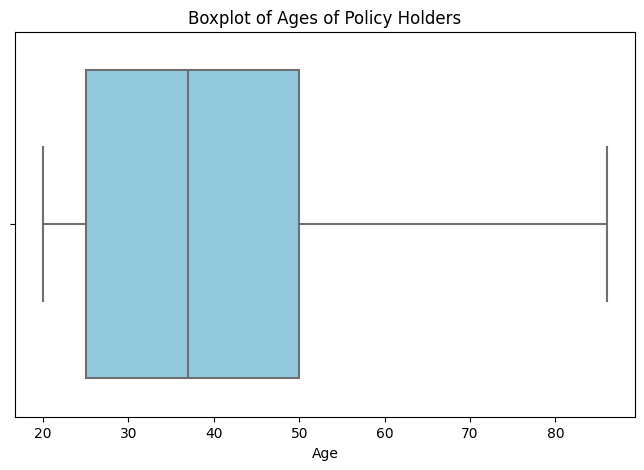

In [9]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Age"], color='skyblue')
plt.title('Boxplot of Ages of Policy Holders')
plt.xlabel('Age')